In [ ]:
!pip install keract

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install kneed

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import csv
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, SpatialDropout2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard
from time import time
from datetime import datetime
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.layers import BatchNormalization

from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

from scikitplot.metrics import plot_confusion_matrix, plot_roc
import os
from scipy.fft import rfft, rfftfreq
from scipy.fft import fft, fftfreq

from sklearn.utils import shuffle

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [ ]:
def get_activations_of_layer(model,keract_inputs,layer_name):
    return get_activations(model, keract_inputs)[layer_name].reshape(-1,1).tolist()

def my_tsne_all_data(layer_act,label):
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(layer_act)
    return z

def get_layer_df(model,n_samples,layer_name):
    my_activations=np.array([])
    my_labels=[]
    for i in range(n_samples):
        my_activations=np.append(my_activations,get_activations_of_layer(model,x_train[i:i+1],layer_name))
        my_labels.append(np.argmax(y_train[i]))

    the_z=my_tsne_all_data(my_activations.reshape(-1,int(my_activations.shape[0]/n_samples)),'a')

    return pd.DataFrame({"comp-1":the_z[:,0],"comp-2":the_z[:,1],"y":my_labels[:]})

def visualizelayer(model,layer_name):
    layer_df=get_layer_df(model,500,layer_name)

    sns.scatterplot(x="comp-1", y="comp-2", hue=layer_df.y.tolist(),
                    palette=sns.color_palette("hls", len(set(layer_df.y.tolist()))),
                    data=layer_df).set(title=layer_name + " T-SNE projection")
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
samples = 1024

#Loading Data

# Normal

# Middle
b = '/content/drive/MyDrive/SEMOS/Summer_Data/Healthy_Pump/'

df = pd.read_csv(b+'normal_150.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_150 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'normal_160.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_160 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'normal_170.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_170 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'normal_180.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_180 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'normal_190.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_190 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'normal_150_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_150_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'normal_160_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_160_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'normal_170_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_170_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'normal_180_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_180_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'normal_190_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_190_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'normal_150_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_150_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'normal_160_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_160_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'normal_170_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_170_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'normal_180_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_180_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'normal_190_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_normal_190_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190
# aggregate

mid_normal = np.concatenate((mid_normal_150, mid_normal_160, mid_normal_170, mid_normal_180, mid_normal_190,
                             mid_normal_150_1, mid_normal_160_1, mid_normal_170_1, mid_normal_180_1, mid_normal_190_1,
                             mid_normal_150_2, mid_normal_160_2, mid_normal_170_2, mid_normal_180_2, mid_normal_190_2), axis=0)*0.12

normal = (mid_normal-np.mean(mid_normal))/np.std(mid_normal)
# mid_normal = (mid_normal-np.mean(mid_normal))

normal = normal.reshape(normal.shape[0],1,samples,1)

In [ ]:
# Low

# Middle

df = pd.read_csv(b+'Low_80.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_80 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #80

df = pd.read_csv(b+'Low_90.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_90 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #90

df = pd.read_csv(b+'Low_100.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_100 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #100

df = pd.read_csv(b+'Low_110.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_110 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #110

df = pd.read_csv(b+'Low_120.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_120 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #120

df = pd.read_csv(b+'Low_130.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_130 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #130


df = pd.read_csv(b+'Low_80_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_80_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #80

df = pd.read_csv(b+'Low_90_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_90_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #90

df = pd.read_csv(b+'Low_100_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_100_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #100

df = pd.read_csv(b+'Low_110_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_110_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #110

df = pd.read_csv(b+'Low_120_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_120_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #120

df = pd.read_csv(b+'Low_130_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_130_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #130


df = pd.read_csv(b+'Low_80_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_80_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #80

df = pd.read_csv(b+'Low_90_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_90_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #90

df = pd.read_csv(b+'Low_100_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_100_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #100

df = pd.read_csv(b+'Low_110_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_110_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #110

df = pd.read_csv(b+'Low_120_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_120_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #120

df = pd.read_csv(b+'Low_130_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_low_130_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #130


mid_low = np.concatenate((mid_low_80, mid_low_90, mid_low_100, mid_low_110, mid_low_120, mid_low_130,
                          mid_low_80_1, mid_low_90_1, mid_low_100_1, mid_low_110_1, mid_low_120_1, mid_low_130_1,
                          mid_low_80_2, mid_low_90_2, mid_low_100_2, mid_low_110_2, mid_low_120_2, mid_low_130_2), axis=0)*0.12
low = (mid_low-np.mean(mid_low))/np.std(mid_low)

low = low.reshape(low.shape[0],1,samples,1)

In [ ]:
# Cavitation

# Middle
df = pd.read_csv(b+'Cav_120.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_120 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #120

df = pd.read_csv(b+'Cav_130.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_130 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #130

df = pd.read_csv(b+'Cav_140.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_140 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #140

df = pd.read_csv(b+'Cav_150.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_150 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Cav_160.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_160 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160


df = pd.read_csv(b+'Cav_120_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_120_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #120

df = pd.read_csv(b+'Cav_130_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_130_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #130

df = pd.read_csv(b+'Cav_140_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_140_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #140

df = pd.read_csv(b+'Cav_150_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_150_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Cav_160_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_160_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160


df = pd.read_csv(b+'Cav_120_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_120_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #120

df = pd.read_csv(b+'Cav_130_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_130_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #130

df = pd.read_csv(b+'Cav_140_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_140_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #140

df = pd.read_csv(b+'Cav_150_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_150_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Cav_160_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1:2]
mid_Cav_160_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160


mid_cav = np.concatenate((mid_Cav_120, mid_Cav_130, mid_Cav_140, mid_Cav_150, mid_Cav_160,
                          mid_Cav_120_1, mid_Cav_130_1, mid_Cav_140_1, mid_Cav_150_1, mid_Cav_160_1,
                          mid_Cav_120_2, mid_Cav_130_2, mid_Cav_140_2, mid_Cav_150_2, mid_Cav_160_2), axis=0)*0.12
cavitation = (mid_cav-np.mean(mid_cav))/np.std(mid_cav)
# cav = (mid_cav-np.mean(mid_cav))

cavitation = cavitation.reshape(cavitation.shape[0],1,samples,1)

In [ ]:
# Minor Defect

# Middle
b = '/content/drive/MyDrive/SEMOS/Summer_Data/Healthy_Pump/'

df = pd.read_csv(b+'Minor_150.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_150 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Minor_160.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_160 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Minor_170.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_170 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Minor_180.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_180 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Minor_190.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_190 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'Minor_150_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_150_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Minor_160_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_160_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Minor_170_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_170_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Minor_180_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_180_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Minor_190_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_190_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'Minor_150_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_150_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Minor_160_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_160_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Minor_170_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_170_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Minor_180_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_180_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Minor_190_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_minor_190_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190
# aggregate

mid_minor = np.concatenate((mid_minor_150, mid_minor_160, mid_minor_170, mid_minor_180, mid_minor_190,
                             mid_minor_150_1, mid_minor_160_1, mid_minor_170_1, mid_minor_180_1, mid_minor_190_1,
                             mid_minor_150_2, mid_minor_160_2, mid_minor_170_2, mid_minor_180_2, mid_minor_190_2), axis=0)*0.12

minor = (mid_minor-np.mean(mid_minor))/np.std(mid_minor)
# mid_minor = (mid_minor-np.mean(mid_minor))

minor = minor.reshape(minor.shape[0],1,samples,1)

In [ ]:
# Major Defect

# Middle
b = '/content/drive/MyDrive/SEMOS/Summer_Data/Healthy_Pump/'

df = pd.read_csv(b+'Major_150.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_150 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Major_160.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_160 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Major_170.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_170 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Major_180.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_180 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Major_190.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_190 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'Major_150_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_150_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Major_160_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_160_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Major_170_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_170_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Major_180_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_180_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Major_190_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_190_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'Major_150_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_150_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Major_160_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_160_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Major_170_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_170_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Major_180_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_180_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Major_190_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_major_190_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190
# aggregate

mid_major = np.concatenate((mid_major_150, mid_major_160, mid_major_170, mid_major_180, mid_major_190,
                             mid_major_150_1, mid_major_160_1, mid_major_170_1, mid_major_180_1, mid_major_190_1,
                             mid_major_150_2, mid_major_160_2, mid_major_170_2, mid_major_180_2, mid_major_190_2), axis=0)*0.12

major = (mid_major-np.mean(mid_major))/np.std(mid_major)
# mid_major = (mid_major-np.mean(mid_major))

major = major.reshape(major.shape[0],1,samples,1)

In [ ]:
# Crack

# Middle
b = '/content/drive/MyDrive/SEMOS/Summer_Data/Healthy_Pump/'

df = pd.read_csv(b+'Crack_150.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_150 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Crack_160.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_160 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Crack_170.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_170 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Crack_180.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_180 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Crack_190.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_190 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'Crack_150_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_150_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Crack_160_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_160_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Crack_170_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_170_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Crack_180_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_180_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Crack_190_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_190_1 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190


df = pd.read_csv(b+'Crack_150_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_150_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #150

df = pd.read_csv(b+'Crack_160_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_160_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #160

df = pd.read_csv(b+'Crack_170_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_170_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #170

df = pd.read_csv(b+'Crack_180_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_180_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #180

df = pd.read_csv(b+'Crack_190_2.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
mid_crack_190_2 = np.array(df1[0:df1.size//samples * samples]).astype(np.float32).reshape(-1,samples) #190
# aggregate

mid_crack = np.concatenate((mid_crack_150, mid_crack_160, mid_crack_170, mid_crack_180, mid_crack_190,
                             mid_crack_150_1, mid_crack_160_1, mid_crack_170_1, mid_crack_180_1, mid_crack_190_1,
                             mid_crack_150_2, mid_crack_160_2, mid_crack_170_2, mid_crack_180_2, mid_crack_190_2), axis=0)*0.12

crack = (mid_crack-np.mean(mid_crack))/np.std(mid_crack)
# mid_crack = (mid_crack-np.mean(mid_crack))

crack = crack.reshape(crack.shape[0],1,samples,1)

In [ ]:
y_normal = np.zeros((normal.shape[0],1)).astype(np.float32)
y_Low = np.ones((low.shape[0],1)).astype(np.float32)
y_cavitation = 2 * np.ones((cavitation.shape[0],1)).astype(np.float32)
y_minor = 3 * np.ones((minor.shape[0],1)).astype(np.float32)
y_major = 4 * np.ones((major.shape[0],1)).astype(np.float32)
y_crack = 5 * np.ones((crack.shape[0],1)).astype(np.float32)

In [ ]:
# x_data = np.concatenate((normal, low, cavitation, minor,major, crack), axis=0)
x_data = np.concatenate((normal, low, cavitation, minor,major), axis=0)
# x_data = np.concatenate((normal, low, cavitation), axis=0)
# y_data = np.concatenate((y_normal, y_Low, y_cavitation, y_minor,y_major, y_crack), axis=0)
y_data = np.concatenate((y_normal, y_Low, y_cavitation, y_minor,y_major), axis=0)
# y_data = np.concatenate((y_normal, y_Low, y_cavitation), axis=0)

y_data = to_categorical(y_data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [ ]:
points = 1024
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=(1,64), activation='relu', input_shape=(1,points,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(32, kernel_size=(1,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(64, kernel_size=(1,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(64, kernel_size=(1,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(64, kernel_size=(1,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
# model.fit(x_train, y_train, epochs=15)

Epoch 1/15
561/561 [==============================] - 19s 15ms/step - loss: 0.4108 - accuracy: 0.8391 - val_loss: 0.0415 - val_accuracy: 0.9848
Epoch 2/15
561/561 [==============================] - 7s 12ms/step - loss: 0.0920 - accuracy: 0.9672 - val_loss: 0.0599 - val_accuracy: 0.9706
Epoch 3/15
561/561 [==============================] - 6s 12ms/step - loss: 0.0605 - accuracy: 0.9797 - val_loss: 0.0627 - val_accuracy: 0.9759
Epoch 4/15
561/561 [==============================] - 6s 11ms/step - loss: 0.0591 - accuracy: 0.9797 - val_loss: 0.0155 - val_accuracy: 0.9938
Epoch 5/15
561/561 [==============================] - 6s 11ms/step - loss: 0.0552 - accuracy: 0.9815 - val_loss: 0.0095 - val_accuracy: 0.9971
Epoch 6/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0529 - accuracy: 0.9827 - val_loss: 0.0224 - val_accuracy: 0.9909
Epoch 7/15
561/561 [==============================] - 6s 11ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.0035 - val_accuracy: 0.998

In [ ]:
from keract import get_activations, display_activations
keract_inputs = x_train[10:11]
keract_targets = y_train[10:11]
activations = get_activations(model, keract_inputs)

In [ ]:
activations.keys()

odict_keys(['conv2d_input', 'conv2d', 'batch_normalization', 'max_pooling2d', 'batch_normalization_1', 'spatial_dropout2d', 'conv2d_1', 'batch_normalization_2', 'max_pooling2d_1', 'batch_normalization_3', 'spatial_dropout2d_1', 'conv2d_2', 'batch_normalization_4', 'max_pooling2d_2', 'batch_normalization_5', 'spatial_dropout2d_2', 'conv2d_3', 'batch_normalization_6', 'max_pooling2d_3', 'batch_normalization_7', 'spatial_dropout2d_3', 'conv2d_4', 'batch_normalization_8', 'max_pooling2d_4', 'batch_normalization_9', 'flatten', 'dense', 'dense_1'])

In [ ]:
activations['dense'].shape

(1, 64)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.031s...
[t-SNE] Computed neighbors for 500 samples in 0.515s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 10.487068
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.331635
[t-SNE] KL divergence after 1000 iterations: 1.120430


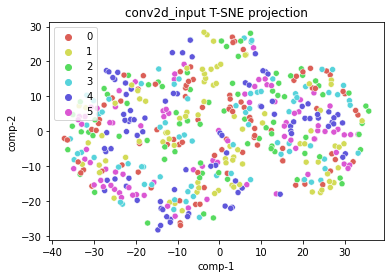

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.438s...
[t-SNE] Computed neighbors for 500 samples in 7.823s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 16.312984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.413666
[t-SNE] KL divergence after 1000 iterations: 1.178157


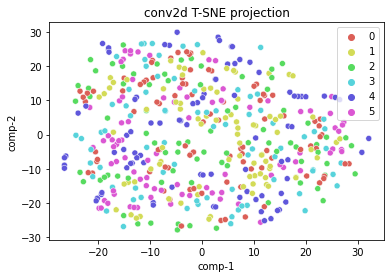

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.432s...
[t-SNE] Computed neighbors for 500 samples in 7.703s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 40.303760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.954803
[t-SNE] KL divergence after 1000 iterations: 1.334213


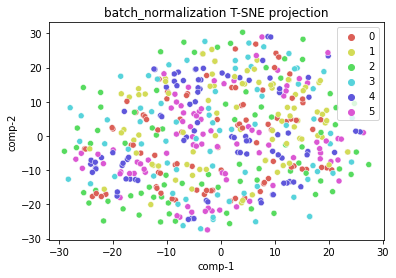

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.231s...
[t-SNE] Computed neighbors for 500 samples in 3.795s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 33.043892
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.561279
[t-SNE] KL divergence after 1000 iterations: 1.295792


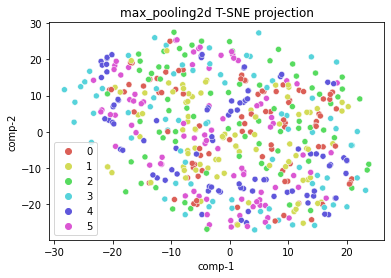

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.239s...
[t-SNE] Computed neighbors for 500 samples in 3.707s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 28.948162
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.862534
[t-SNE] KL divergence after 1000 iterations: 1.295863


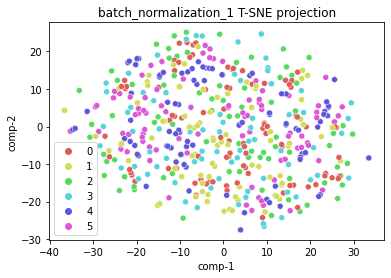

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.235s...
[t-SNE] Computed neighbors for 500 samples in 3.667s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 28.948162
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.862534
[t-SNE] KL divergence after 1000 iterations: 1.295863


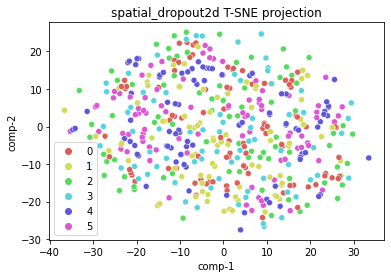

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.435s...
[t-SNE] Computed neighbors for 500 samples in 7.748s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 29.135164
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.506104
[t-SNE] KL divergence after 1000 iterations: 1.287430


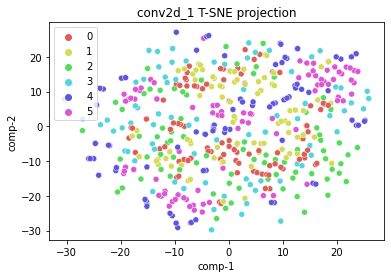

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.454s...
[t-SNE] Computed neighbors for 500 samples in 7.769s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 35.406986
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.983971
[t-SNE] KL divergence after 1000 iterations: 1.326266


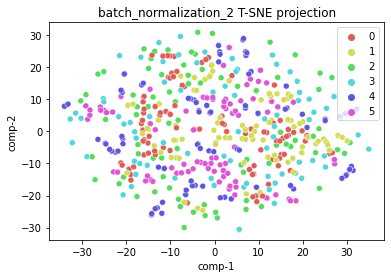

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.198s...
[t-SNE] Computed neighbors for 500 samples in 3.586s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 27.607460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.924873
[t-SNE] KL divergence after 1000 iterations: 1.150476


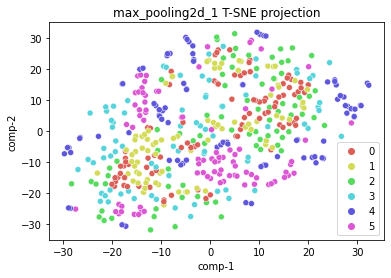

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.214s...
[t-SNE] Computed neighbors for 500 samples in 3.681s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 24.480232
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.755234
[t-SNE] KL divergence after 1000 iterations: 1.188933


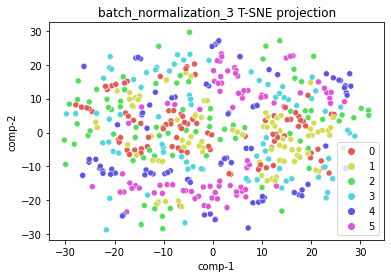

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.195s...
[t-SNE] Computed neighbors for 500 samples in 3.573s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 24.480232
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.755234
[t-SNE] KL divergence after 1000 iterations: 1.188933


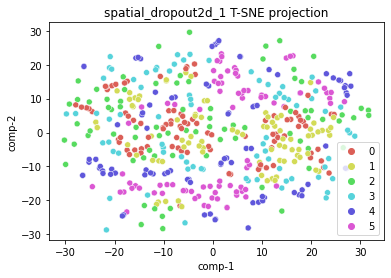

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.442s...
[t-SNE] Computed neighbors for 500 samples in 7.523s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 44.295972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.121521
[t-SNE] KL divergence after 1000 iterations: 0.855001


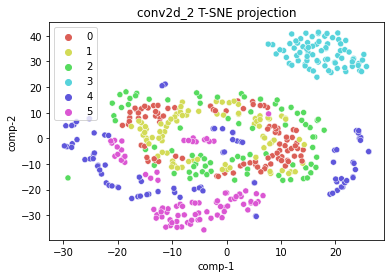

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.412s...
[t-SNE] Computed neighbors for 500 samples in 7.485s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 38.332074
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.952911
[t-SNE] KL divergence after 1000 iterations: 0.924341


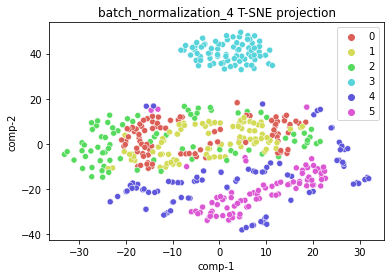

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.207s...
[t-SNE] Computed neighbors for 500 samples in 3.557s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 30.527255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.468094
[t-SNE] KL divergence after 1000 iterations: 0.719800


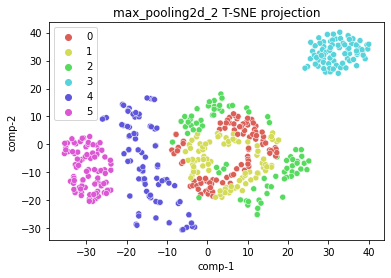

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.208s...
[t-SNE] Computed neighbors for 500 samples in 3.702s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 26.370037
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.455193
[t-SNE] KL divergence after 1000 iterations: 0.730066


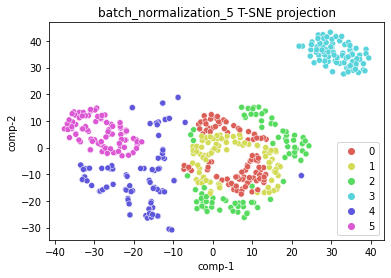

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.220s...
[t-SNE] Computed neighbors for 500 samples in 3.697s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 26.370037
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.455193
[t-SNE] KL divergence after 1000 iterations: 0.730066


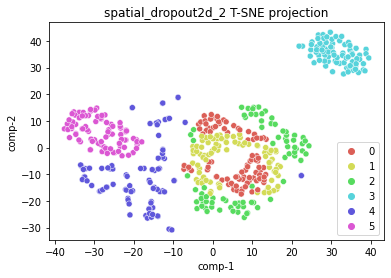

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.210s...
[t-SNE] Computed neighbors for 500 samples in 3.483s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 56.070719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.788628
[t-SNE] KL divergence after 1000 iterations: 0.570909


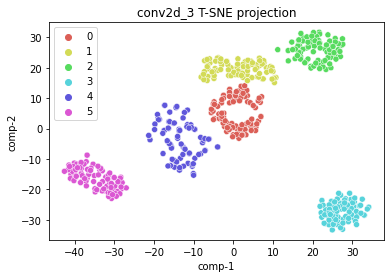

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.213s...
[t-SNE] Computed neighbors for 500 samples in 3.638s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 28.166999
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.103218
[t-SNE] KL divergence after 1000 iterations: 0.543994


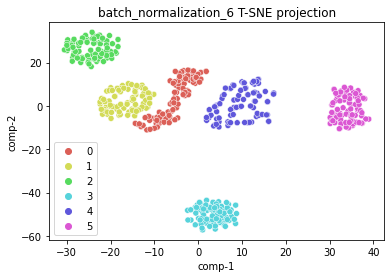

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.106s...
[t-SNE] Computed neighbors for 500 samples in 1.732s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 18.973978
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.044159
[t-SNE] KL divergence after 1000 iterations: 0.480250


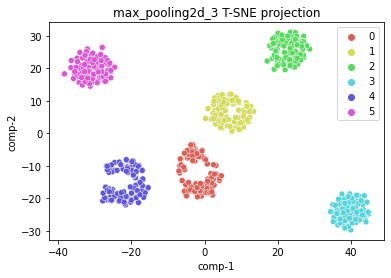

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.098s...
[t-SNE] Computed neighbors for 500 samples in 1.722s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 17.583441
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.287697
[t-SNE] KL divergence after 1000 iterations: 0.488541


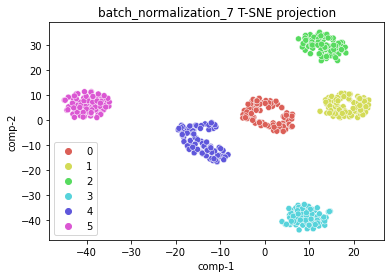

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.100s...
[t-SNE] Computed neighbors for 500 samples in 1.741s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 17.583441
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.287697
[t-SNE] KL divergence after 1000 iterations: 0.488541


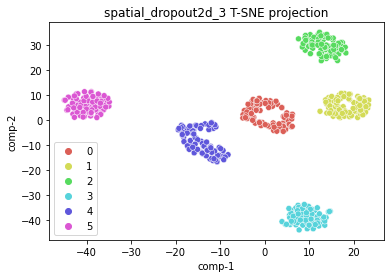

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.098s...
[t-SNE] Computed neighbors for 500 samples in 1.694s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 39.118079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.705727
[t-SNE] KL divergence after 1000 iterations: 0.538226


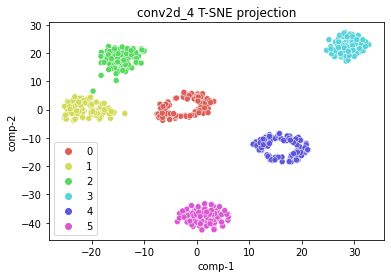

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.100s...
[t-SNE] Computed neighbors for 500 samples in 1.708s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 12.651463
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.082260
[t-SNE] KL divergence after 1000 iterations: 0.516531


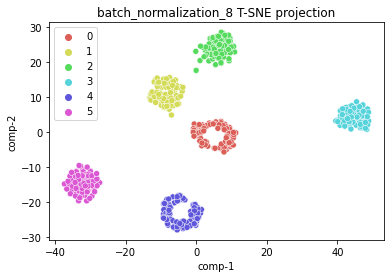

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.050s...
[t-SNE] Computed neighbors for 500 samples in 0.853s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 8.974896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.977859
[t-SNE] KL divergence after 1000 iterations: 0.513758


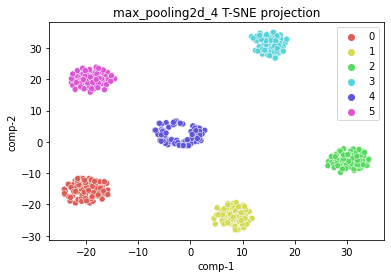

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.050s...
[t-SNE] Computed neighbors for 500 samples in 0.897s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 7.841717
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.535339
[t-SNE] KL divergence after 1000 iterations: 0.521849


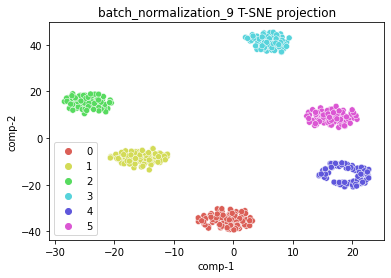

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.048s...
[t-SNE] Computed neighbors for 500 samples in 0.868s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 7.841717
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.535339
[t-SNE] KL divergence after 1000 iterations: 0.521849


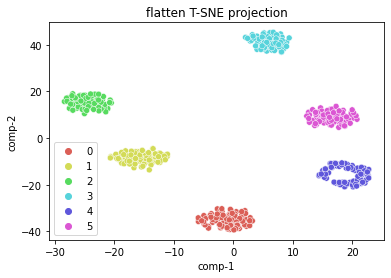

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.002s...
[t-SNE] Computed neighbors for 500 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 8.803813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.063721
[t-SNE] KL divergence after 1000 iterations: 0.212692


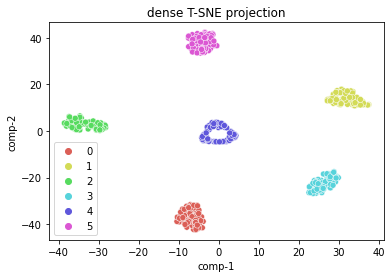

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.228859
[t-SNE] KL divergence after 1000 iterations: 0.145527


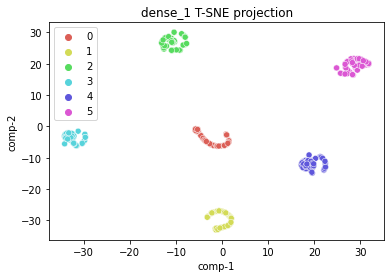

In [ ]:
for layername in activations.keys():
   visualizelayer(model,layername)

In [ ]:
layer_df=get_layer_df(model,500,'dense')
layer_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 11.437278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.701889
[t-SNE] KL divergence after 1000 iterations: 0.244031


,comp-1,comp-2,y
0,25.987198,17.207727,0
1,-13.959373,19.650978,4
2,-18.747520,13.709213,4
3,-17.396841,14.363937,4
4,-0.105278,-24.565916,1
...,...,...,...
495,0.060989,-27.779228,1
496,-27.314074,-16.027252,2
497,-13.502345,18.688786,4
498,26.687748,-11.045518,3


In [ ]:
y_minor = to_categorical(y_minor)
y_major = to_categorical(y_major)
y_crack = to_categorical(y_crack)

In [ ]:
layer_name = 'dense'
my_activations=np.array([])
my_labels=[]
for i in range(500):
    my_activations=np.append(my_activations,get_activations_of_layer(model,x_train[i:i+1],layer_name))
    my_labels.append(np.argmax(y_train[i]))

for i in range(100):
        my_activations=np.append(my_activations,get_activations_of_layer(model,minor[i:i+1],layer_name))
        my_labels.append(np.argmax(y_minor[i]))
        my_activations=np.append(my_activations,get_activations_of_layer(model,major[i:i+1],layer_name))
        my_labels.append(np.argmax(y_major[i]))
        my_activations=np.append(my_activations,get_activations_of_layer(model,crack[i:i+1],layer_name))
        my_labels.append(np.argmax(y_crack[i]))

In [ ]:
the_z=my_tsne_all_data(my_activations.reshape(-1,int(my_activations.shape[0]/800)),'a')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.001s...
[t-SNE] Computed neighbors for 800 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 10.141641
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.043053
[t-SNE] KL divergence after 1000 iterations: 0.411211


In [ ]:
mine = pd.DataFrame({"comp-1":the_z[:,0],"comp-2":the_z[:,1],"y":my_labels[:]})
mine

,comp-1,comp-2,y
0,-35.017204,12.382537,0
1,-21.714975,-22.613422,4
2,-25.134966,-31.871712,4
3,-26.509527,-35.196388,4
4,-5.659009,3.950142,1
...,...,...,...
795,-12.589046,-28.209661,4
796,26.170969,-17.167013,5
797,-1.070448,40.814083,3
798,-17.484213,-35.138031,4


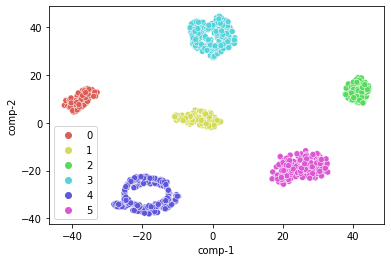

In [ ]:
layer_df=mine

sns.scatterplot(x="comp-1", y="comp-2", hue=layer_df.y.tolist(),
                palette=sns.color_palette("hls", len(set(layer_df.y.tolist()))),
                data=layer_df)#.set(title=layer_name + " T-SNE projection")
#plt.rcParams.update({'font.family':'sans-serif','font.sans-serif':'Times New Roman','font.size': 12})
#plt.savefig(os.path.join('vizualizations', f'tsne_tsne_dense_1.pdf'),format='pdf')
plt.show()

In [ ]:
X = the_z

In [ ]:
db = DBSCAN(eps=3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 6
Estimated number of noise points: 0


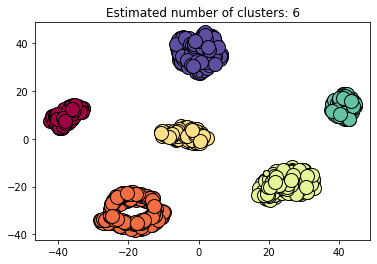

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
sse = {}
#for k in range(previous_num_of_labels, previous_num_of_labels+2):
for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(X)
        sse[k] = kmeans.inertia_

kn = KneeLocator(x=list(sse.keys()),
                 y=list(sse.values()),
                 curve='convex',
                 direction='decreasing')
k = kn.knee
k

6

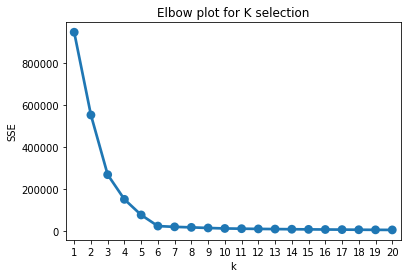

In [ ]:
plt.title('Elbow plot for K selection')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),
              y=list(sse.values()))
#plt.rcParams.update({'font.family':'sans-serif','font.sans-serif':'Times New Roman','font.size': 12})
#plt.savefig(os.path.join('vizualizations', f'sse-kmeans.pdf'),format='pdf')
plt.show()

In [ ]:
# Test - Middle

# Normal

# df = pd.read_csv(b+'test_normal_160.txt', delimiter = "\t")
# df1 = df.iloc[:, 1]
# test_normal_160 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
# test_normal_160 = (test_normal_160-np.mean(test_normal_160))/np.std(test_normal_160)
# # test_normal_160 = (test_normal_160-np.mean(test_normal_160))
# # test_normal_160 = (test_normal_160-np.mean(mid_normal))/np.std(mid_normal)
# test_normal_160 = test_normal_160.reshape(test_normal_160.shape[0],1,samples,1)

df = pd.read_csv(b+'test_normal_190.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_normal_190 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_normal_190 = (test_normal_190-np.mean(test_normal_190))/np.std(test_normal_190)
# test_normal_190 = (test_normal_190-np.mean(test_normal_190))
# test_normal_190 = (test_normal_190-np.mean(mid_normal))/np.std(mid_normal)
test_normal_190 = test_normal_190.reshape(test_normal_190.shape[0],1,samples,1)

# Low

df = pd.read_csv(b+'test_low_80.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_low_80 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_low_80 = (test_low_80-np.mean(test_low_80))/np.std(test_low_80)
# test_low_80 = (test_low_80-np.mean(test_low_80))
# test_low_80 = (test_low_80-np.mean(mid_low))/np.std(mid_low)
test_low_80 = test_low_80.reshape(test_low_80.shape[0],1,samples,1)

df = pd.read_csv(b+'test_low_120.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_low_120 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_low_120 = (test_low_120-np.mean(test_low_120))/np.std(test_low_120)
# test_low_120 = (test_low_120-np.mean(test_low_120))
# test_low_120 = (test_low_120-np.mean(mid_low))/np.std(mid_low)
test_low_120 = test_low_120.reshape(test_low_120.shape[0],1,samples,1)

# Cavitation

df = pd.read_csv(b+'test_Cav_130.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_cav_130 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_cav_130 = (test_cav_130-np.mean(test_cav_130))/np.std(test_cav_130)
# test_cav_130 = (test_cav_130-np.mean(test_cav_130))
# test_cav_130 = (test_cav_130-np.mean(mid_cav))/np.std(mid_cav)
test_cav_130 = test_cav_130.reshape(test_cav_130.shape[0],1,samples,1)

df = pd.read_csv(b+'test_Cav_150.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_cav_150 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_cav_150 = (test_cav_150-np.mean(test_cav_150))/np.std(test_cav_150)
# test_cav_150 = (test_cav_150-np.mean(test_cav_150))
# test_cav_150 = (test_cav_150-np.mean(mid_cav))/np.std(mid_cav)
test_cav_150 = test_cav_150.reshape(test_cav_150.shape[0],1,samples,1)

y_test_normal = np.zeros((test_normal_190.shape[0],1)).astype(np.float32)
y_test_normal = to_categorical(y_test_normal, num_classes=3)

y_test_low = 1 * np.ones((test_low_120.shape[0],1)).astype(np.float32)
y_test_low = to_categorical(y_test_low, num_classes=3)

y_test_cav = 2 * np.ones((test_cav_150.shape[0],1)).astype(np.float32)
y_test_cav = to_categorical(y_test_cav, num_classes=3)


In [ ]:
pred = np.argmax(model.predict(test_normal_190), axis = 1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pred = np.argmax(model.predict(test_low_120), axis = 1)
pred

array([4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
pred = np.argmax(model.predict(test_low_80), axis = 1)
pred

array([5, 1, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
pred = np.argmax(model.predict(test_cav_130), axis = 1)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
pred = np.argmax(model.predict(test_cav_150), axis = 1)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Test - Middle

# Normal

df = pd.read_csv(b+'test_normal_160_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_normal_160 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_normal_160 = (test_normal_160-np.mean(test_normal_160))/np.std(test_normal_160)
# test_normal_160 = (test_normal_160-np.mean(test_normal_160))
# test_normal_160 = (test_normal_160-np.mean(mid_normal))/np.std(mid_normal)
test_normal_160 = test_normal_160.reshape(test_normal_160.shape[0],1,samples,1)

df = pd.read_csv(b+'test_normal_190_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_normal_190 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_normal_190 = (test_normal_190-np.mean(test_normal_190))/np.std(test_normal_190)
# test_normal_190 = (test_normal_190-np.mean(test_normal_190))
# test_normal_190 = (test_normal_190-np.mean(mid_normal))/np.std(mid_normal)
test_normal_190 = test_normal_190.reshape(test_normal_190.shape[0],1,samples,1)

# Low

df = pd.read_csv(b+'test_low_80_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_low_80 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_low_80 = (test_low_80-np.mean(test_low_80))/np.std(test_low_80)
# test_low_80 = (test_low_80-np.mean(test_low_80))
# test_low_80 = (test_low_80-np.mean(mid_low))/np.std(mid_low)
test_low_80 = test_low_80.reshape(test_low_80.shape[0],1,samples,1)

df = pd.read_csv(b+'test_low_120_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_low_120 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_low_120 = (test_low_120-np.mean(test_low_120))/np.std(test_low_120)
# test_low_120 = (test_low_120-np.mean(test_low_120))
# test_low_120 = (test_low_120-np.mean(mid_low))/np.std(mid_low)
test_low_120 = test_low_120.reshape(test_low_120.shape[0],1,samples,1)

# Cavitation

df = pd.read_csv(b+'test_Cav_130_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_cav_130 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_cav_130 = (test_cav_130-np.mean(test_cav_130))/np.std(test_cav_130)
# test_cav_130 = (test_cav_130-np.mean(test_cav_130))
# test_cav_130 = (test_cav_130-np.mean(mid_cav))/np.std(mid_cav)
test_cav_130 = test_cav_130.reshape(test_cav_130.shape[0],1,samples,1)

df = pd.read_csv(b+'test_Cav_150_1.txt', delimiter = "\t")
df1 = df.iloc[:, 1]
test_cav_150 = np.array(df1[0:81920]).astype(np.float32).reshape(-1,samples)*0.12
test_cav_150 = (test_cav_150-np.mean(test_cav_150))/np.std(test_cav_150)
# test_cav_150 = (test_cav_150-np.mean(test_cav_150))
# test_cav_150 = (test_cav_150-np.mean(mid_cav))/np.std(mid_cav)
test_cav_150 = test_cav_150.reshape(test_cav_150.shape[0],1,samples,1)

y_test_normal = np.zeros((test_normal_190.shape[0],1)).astype(np.float32)
y_test_normal = to_categorical(y_test_normal, num_classes=3)

y_test_low = 1 * np.ones((test_low_120.shape[0],1)).astype(np.float32)
y_test_low = to_categorical(y_test_low, num_classes=3)

y_test_cav = 2 * np.ones((test_cav_150.shape[0],1)).astype(np.float32)
y_test_cav = to_categorical(y_test_cav, num_classes=3)


In [ ]:
pred = np.argmax(model.predict(test_normal_160), axis = 1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model.save('/content/drive/MyDrive/SEMOS/Summer_Data/Healthy_Pump/final_model_V2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SEMOS/Summer_Data/Healthy_Pump/final_model_V2/assets


In [ ]:
file = '/content/drive/MyDrive/SEMOS/Summer_Data/outtest2.csv'
df = pd.read_csv(file)
df1 = df.iloc[:, 2]

normal1 = np.array(df1[451586:451586+10*1024]).astype(np.float32).reshape(10,1024)
normal1 = (normal1-np.mean(normal1))/np.std(normal1)
normal1 = normal1.reshape(10,1,1024,1)

low1 = np.array(df1[470018:470018+10*1024]).astype(np.float32).reshape(10,1024)
low1 = low1.reshape(10,1,1024,1)
low1 = (low1-np.mean(low1))/np.std(low1)

cav1 = np.array(df1[488450:488450+10*1024]).astype(np.float32).reshape(10,1024)
cav1 = cav1.reshape(10,1,1024,1)
cav1 = (cav1-np.mean(cav1))/np.std(cav1)

In [ ]:
pred = np.argmax(model.predict(normal1), axis = 1)
pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
pred = np.argmax(model.predict(low1), axis = 1)
pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
pred = np.argmax(model.predict(cav1), axis = 1)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from keract import get_activations, display_activations
keract_inputs = x_train[10:11]
keract_targets = y_train[10:11]
activations = get_activations(model, keract_inputs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.130898
[t-SNE] KL divergence after 1000 iterations: 0.172721


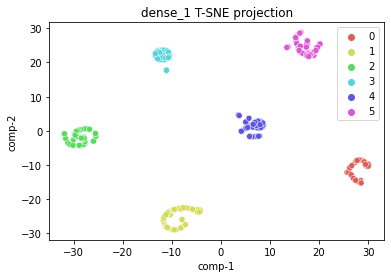

In [ ]:
visualizelayer(model,list(activations.keys())[-1])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.028s...
[t-SNE] Computed neighbors for 500 samples in 0.510s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 9.944702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.516365
[t-SNE] KL divergence after 1000 iterations: 1.091858


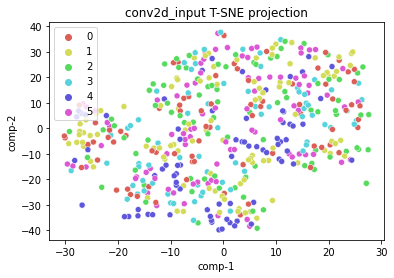

In [ ]:
visualizelayer(model,list(activations.keys())[0])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.049s...
[t-SNE] Computed neighbors for 500 samples in 0.886s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 8.907370
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.844475
[t-SNE] KL divergence after 1000 iterations: 0.573146


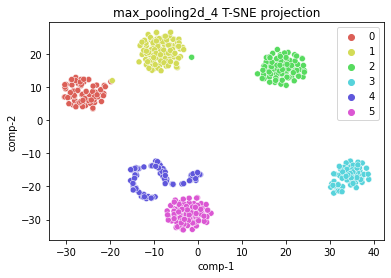

In [ ]:
visualizelayer(model,list(activations.keys())[-5])